In [193]:
using Plots;
using Statistics;

#### Q1.1

In [1]:
@enum InfectionStatus S I R

In [2]:
instances(InfectionStatus)

(S, I, R)

In [8]:
x = S

S::InfectionStatus = 0

In [9]:
typeof(x)

Enum InfectionStatus:
S = 0
I = 1
R = 2

#### Q1.2

In [14]:
x = Int(x)

0

#### Q1.3 - 1.6

In [139]:
N = 100;

agents = [S for i in 1:100];

In [140]:
agents[rand(1:100)] = I;

In [38]:
bernoulli(p) = rand() < p

bernoulli (generic function with 1 method)

In [397]:
function fetch_victim(antag)
    candidate_victim = rand(1:N)
    if antag == candidate_victim
        fetch_victim(antag)
    else
        return candidate_victim
    end
end

function step!(agents, N, p_I)
    spreader = rand(1:N)
    if agents[spreader] == I
        victim = fetch_victim(spreader)
        if (agents[victim] == S) & (bernoulli(p_I))
            agents[victim] = I
            return "infected"
        end
    else
        return "agent not infectious"
    end
end 

step! (generic function with 4 methods)

In [398]:
function sweep!(agents, p_I, N)
    map(i -> step!(agents, N, p_I), 1:N)
    return 0
end

sweep! (generic function with 3 methods)

In [149]:
sweep!(agents, 0.5, 100000)

0

#### Q1.7 - 1.9

In [399]:
function infection_simulation(N, p_I, T)
    agents = [S for i in 1:N]
    agents[rand(1:N)] = I
    Is = [1]
    for i in 1:T
       sweep!(agents, p_I, N) 
       push!(Is, sum(Int, agents[agents .== I]))
    end
    return Is
end

infection_simulation (generic function with 1 method)

In [400]:
results = [infection_simulation(100, 0.02, 1000) for i in 1:50];

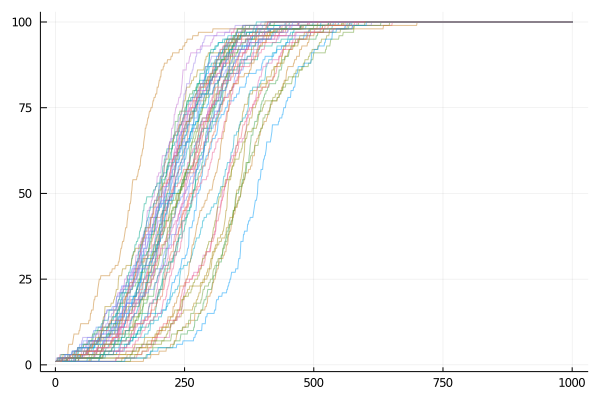

In [404]:
plot(results, la=0.5, legend=false)

#### Q1.9 - 1.10

In [386]:
#this looks derro af yuck

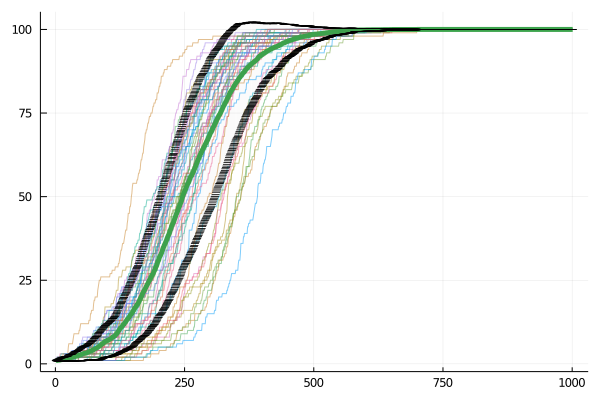

In [405]:
plot!(mean(results), width=5)
plot!(mean(results), yerr=std(results), color="pink", width=0.01, la=0.01)

#### Q1.11
The CDF

#### Q2.1

In [218]:
mutable struct Agent
    status::InfectionStatus
    num_infected::Int
end

In [219]:
Agent() = Agent(S, 0)

Agent

In [223]:
methods(Agent)

# 3 methods for type constructor:
[1] Agent() in Main at In[219]:1
[2] Agent(status::InfectionStatus, num_infected::Int64) in Main at In[218]:2
[3] Agent(status, num_infected) in Main at In[218]:2

In [256]:
function fetch_victim(antag)
    candidate_victim = rand(1:N)
    if antag == candidate_victim
        fetch_victim(antag)
    else
        return candidate_victim
    end
end

function step!(agents::Vector{Agent}, N, p_I)
    spreader = rand(1:N)
    if agents[spreader].status == I
        victim = fetch_victim(spreader)
        if (agents[victim].status == S) & (bernoulli(p_I))
            agents[victim].status = I
            agents[spreader].num_infected+=1
            return "infected"
        end
    else
        return "agent not infectious"
    end
end 

function sweep!(agents::Vector{Agent}, p_I, N)
    map(i -> step!(agents, N, p_I), 1:N)
    return 0
end

function num_infected_dist_simulation(N, p_I, T)
    agents = [Agent() for i in 1:N]
    agents[rand(1:N)].status = I
    Is = [1]
    for i in 1:T
       sweep!(agents, p_I, N) 
       push!(Is, sum(Int, [1 for x in agents if x.status == I]))
    end
    nums, probs = probability_distribution([x.num_infected for x in agents])
    return nums, probs
end

num_infected_dist_simulation (generic function with 1 method)

In [253]:
function counts(data)
    
    count_dict = Dict{Int, Int}()
    
    for item in data
        if haskey(count_dict, item)
            count_dict[item] += 1
        else
            count_dict[item] = 1
        end
    end
    ks, vs = collect(keys(count_dict)),collect(values(count_dict))
    p = sortperm(ks)

    return ks[p], vs[p]
    
end

function probability_distribution(data)
    
    keys, values = counts(data)
    
    denom = sum(values)
    
    prob = values ./ denom
    
    return keys, prob
end

probability_distribution (generic function with 1 method)

In [264]:
results = [num_infected_dist_simulation(100, 0.02, 1000) for i in 1:50];

In [317]:
probs = Dict{Int, Float64}()
for (values, dist) in results
    local_results = Dict(zip(values, dist))    
    for value in values
        if haskey(probs, value)
            probs[value] = (probs[value] + local_results[value])/2 
        else
            probs[value] = local_results[value]    
        end
    end
end
probs;

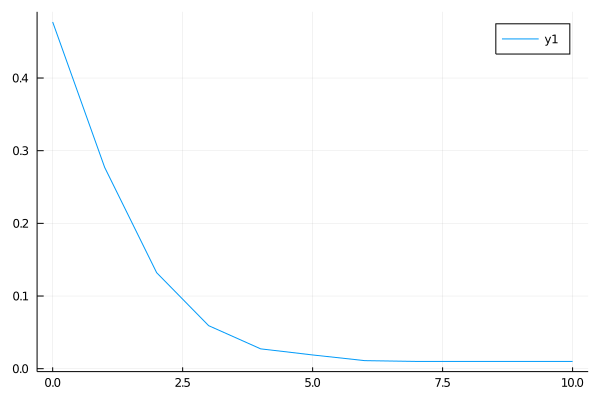

In [318]:
plot(probs)

#### Q3.1 - 3.3

In [392]:
function fetch_victim(antag,N)
    candidate_victim = rand(1:N)
    if antag == candidate_victim
        fetch_victim(antag)
    else
        return candidate_victim
    end
end

function step!(agents::Vector{Agent}, N, p_I, p_R)
    spreader = rand(1:N)
    if agents[spreader].status == I
        victim = fetch_victim(spreader, N)
        if (agents[victim].status == S) & (bernoulli(p_I))
            agents[victim].status = I
            agents[spreader].num_infected+=1
            return "infected"
        end
        if bernoulli(p_R)
            agents[spreader].status = R
        end
    else
        return "agent not infectious"
    end
end 

function sweep!(agents::Vector{Agent}, p_I, p_R, N)
    map(i -> step!(agents, N, p_I, p_R), 1:N)
    return 0
end

function simulation_with_recovery(N, p_I, p_R, T)
    agents = [Agent() for i in 1:N]
    agents[rand(1:N)].status = I
    Ss = [N]
    Is = [1]
    Rs = [0]
    for i in 1:T
       sweep!(agents, p_I, p_R, N) 
       push!(Is, sum(push!([1 for x in agents if x.status == I],0)))
       push!(Rs, sum(push!([1 for x in agents if x.status == R],0)
            )) 
       push!(Ss, sum(push!([1 for x in agents if x.status == S],0)))  
    end
    nums, probs = probability_distribution([x.num_infected for x in agents])
    return [Ss, Is, Rs, nums, probs, agents]
#     return Is
end


simulation_with_recovery (generic function with 1 method)

In [393]:
results = simulation_with_recovery(1000, 0.1, 0.01, 1000);

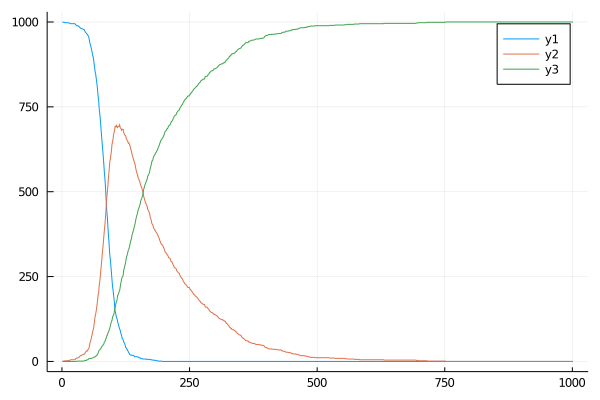

In [394]:
plot(results[1])
plot!(results[2])
plot!(results[3])

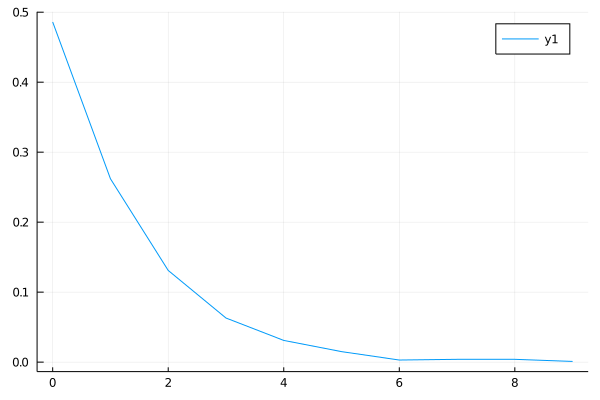

In [395]:
#May have misinterpreted this question - seems identical to the previous question
plot(results[4], results[5])

#### Q3.4

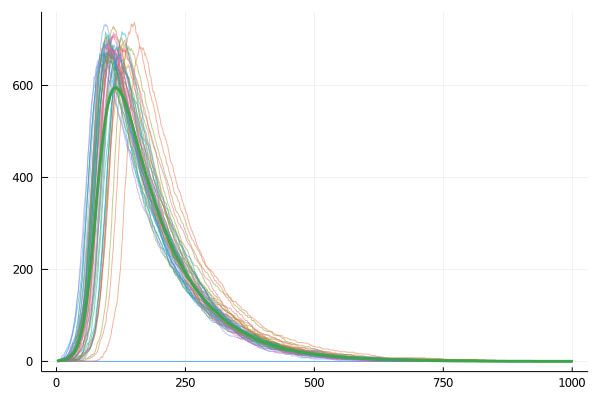

In [384]:
function simulation_with_recovery(N, p_I, p_R, T)
    agents = [Agent() for i in 1:N]
    agents[rand(1:N)].status = I
    Ss = [N]
    Is = [1]
    Rs = [0]
    for i in 1:T
       sweep!(agents, p_I, p_R, N) 
       push!(Is, sum(push!([1 for x in agents if x.status == I],0)))
       push!(Rs, sum(push!([1 for x in agents if x.status == R],0)
            )) 
       push!(Ss, sum(push!([1 for x in agents if x.status == S],0)))  
    end
    nums, probs = probability_distribution([x.num_infected for x in agents])
    return Is
end


results = [simulation_with_recovery(1000, 0.1, 0.01, 1000) for i in 1:50];

plot(results, la=0.5, legend=false)
plot!(mean(results), width=3)


#### Q3.5
3 measures: width, height, area under curve